In [2]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import *
from wordcloud import WordCloud




In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/project dataset/training.1600000.processed.noemoticon.csv', encoding=('ISO-8859-1'), engine='python', error_bad_lines=False)
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()
print(data.shape)

(1599999, 6)


In [6]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)
data.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [7]:
data['target'] = data['target'].replace(4, 1)

1    800000
0    799999
Name: target, dtype: int64
[0.50000031 0.49999969]
[0.49999968749980467, 0.5000003125001953]
['0', '1']
1    800000
0    799999
Name: target, dtype: int64


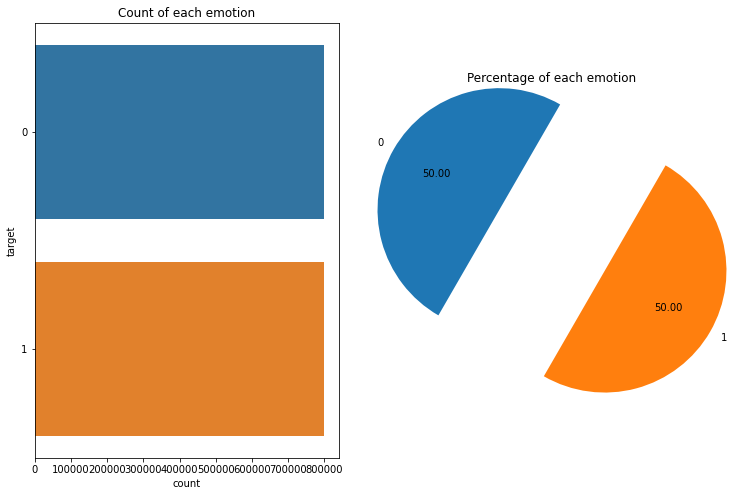

In [9]:
col = 'target'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(data[col].dropna().value_counts());
print((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts()))));
explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
print(explode);
labels = ['0','1'];
print(labels);
sizes = data[col].value_counts()
print(sizes)
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f')
ax2.add_artist(plt.Circle((5,5),0.7,fc='white'))
sns.countplot(y =col, data = data, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [8]:
#DATA CLEANING

# Remove pattern function
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

# Remove Twitter Handles
data['Clean_TweetText'] = np.vectorize(remove_pattern)(data['TweetText'], "@[\w]*")
data.head()

#remove links
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "")

#remove punctuation marks, numbers and special characters
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")

#remove stop words
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving mad see
4,0,@Kwesidei not the whole crew,whole crew


In [10]:
#text tokenization & normalization
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, might, cry,..."
1,0,@Kenichan I dived many times for the ball. Man...,"[dived, many, times, ball, managed, save, rest..."
2,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all....","[behaving, mad, see]"
4,0,@Kwesidei not the whole crew,"[whole, crew]"


In [11]:
#lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, might, cry,..."
1,0,@Kenichan I dived many times for the ball. Man...,"[dived, many, time, ball, managed, save, rest,..."
2,0,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all....","[behaving, mad, see]"
4,0,@Kwesidei not the whole crew,"[whole, crew]"


In [12]:
#stitch tokens back together
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving mad see
4,0,@Kwesidei not the whole crew,whole crew


In [13]:
#remove small words
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might result sch...
1,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behaving
4,0,@Kwesidei not the whole crew,whole crew


In [14]:
# Calculate Polarity
analyser = SentimentIntensityAnalyzer()
scoresArray = []
for tweet in data['Clean_TweetText']:
  score = analyser.polarity_scores(tweet)
  scoresArray.append(score)

scores = pd.DataFrame.from_dict(scoresArray)

In [15]:
data = pd.merge(data, scores, right_index=True, left_index=True)
data.head()

,target,TweetText,Clean_TweetText,neg,neu,pos,compound
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might result sch...,0.333,0.667,0.000,-0.4588
1,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound,0.000,0.686,0.314,0.4939
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire,0.450,0.300,0.250,-0.2500
3,0,"@nationwideclass no, it's not behaving at all....",behaving,0.000,1.000,0.000,0.0000
4,0,@Kwesidei not the whole crew,whole crew,0.000,1.000,0.000,0.0000


In [16]:
#filtering tweets to keep only those whose twint polarity and vader polarity matches
data = data[(((data.target == 0) & (data.compound < 0)) | ((data.target == 1) & (data.compound > 0)))]
data.head()
print(data.shape)

(743578, 7)


1    469095
0    274483
Name: target, dtype: int64
[0.63086186 0.36913814]
[0.3691381401816622, 0.6308618598183379]
['0', '1']
1    469095
0    274483
Name: target, dtype: int64


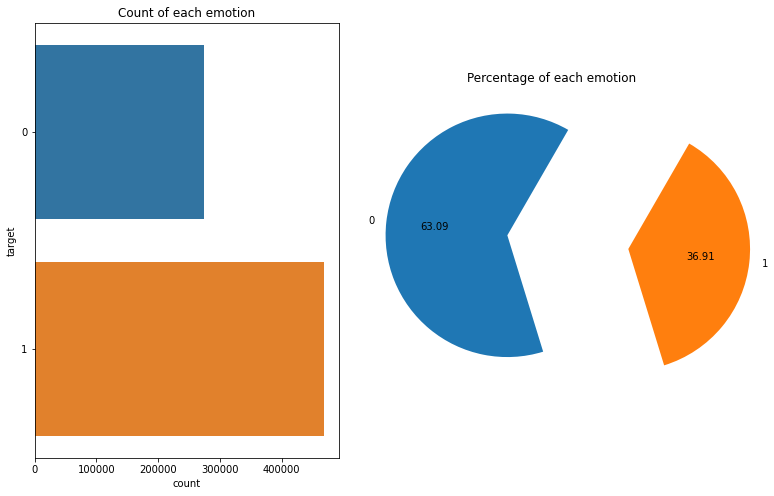

In [17]:
#filtered tweets positive and negative count

col = 'target'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(data[col].dropna().value_counts());
print((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts()))));
explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
print(explode);
labels = ['0','1'];
print(labels);
sizes = data[col].value_counts()
print(sizes)
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f')
ax2.add_artist(plt.Circle((5,5),0.7,fc='white'))
sns.countplot(y =col, data = data, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

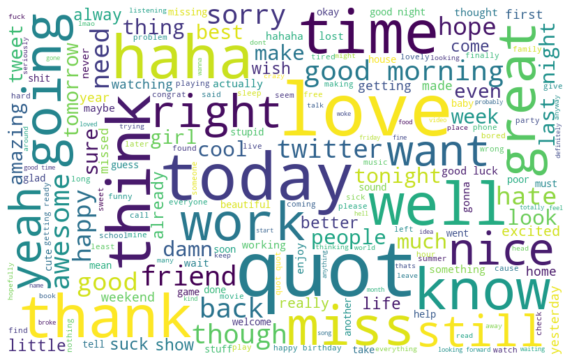

In [18]:
#Word Cloud Data visualization (ALL WORDS)
all_words = ' '.join([text for text in data['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white', max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

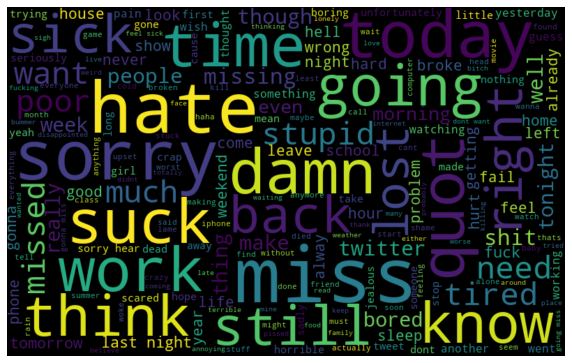

In [19]:
#Word Cloud Data Visualiztion (DEPRESSIVE WORDS)
depressive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [20]:
data.drop(['neg','neu','pos','compound'],axis = 1,inplace = True)
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, might, resu..."
2,0,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
11,0,@caregiving I couldn't bear to watch it. And ...,"[bear, watch, thought, loss, embarrassing]"
15,0,Hollis' death scene will hurt me severely to w...,"[hollis, death, scene, hurt, severely, watch, ..."
24,0,I hate when I have to call and wake people up,"[hate, call, wake, people]"


In [21]:
!pip install --upgrade gensim
import gensim
import multiprocessing

cores = multiprocessing.cpu_count()

w2v_model = gensim.models.Word2Vec(min_count=1, window=2, vector_size=300, alpha=0.03, min_alpha=0.0007, workers=cores-1)
w2v_model.build_vocab(data['Clean_TweetText'], progress_per=10000)

w2v_model.train(data['Clean_TweetText'], epochs=10, total_examples=len(data['Clean_TweetText']))

     |████████████████████████████████| 24.1 MB 2.7 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


(41102228, 44776270)

In [59]:
w2v_model.wv.most_similar("nice")

[('lovely', 0.5992089509963989),
 ('great', 0.5318376421928406),
 ('decent', 0.5082312822341919),
 ('cool', 0.4979337453842163),
 ('wonderful', 0.4809718132019043),
 ('neat', 0.47755709290504456),
 ('good', 0.477127343416214),
 ('fabulous', 0.4593602120876312),
 ('grim', 0.4410874545574188),
 ('chairty', 0.4358680248260498)]

In [22]:
vocab=w2v_model.wv.key_to_index
print("The total number of words are : ",len(vocab))

The total number of words are :  144312


In [23]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ", len(word_vec_dict))

The no of key-value pairs :  144312


In [24]:
from sklearn.model_selection import train_test_split

#keras
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [25]:
# maximum length of tweet
max_length = -1
for i, tweet in enumerate(data['Clean_TweetText']):
  if(len(tweet)>max_length):
    max_length=len(tweet)
print(max_length)

#stitch tokens back together
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))

29


In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Clean_TweetText'])
vocab_size = len(tokenizer.word_index) + 1
encoded_tweets = tokenizer.texts_to_sequences(data['Clean_TweetText'])
print(encoded_tweets[1])

[253, 450, 24, 1517, 3, 650]


In [27]:
max_length = max_length + 1  # max lenght of a token
vocab_size = len(tokenizer.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [28]:
padded_tweets= pad_sequences(encoded_tweets, maxlen=max_length, padding='post')
padded_tweets.shape

(743578, 30)

In [29]:
#embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tokenizer.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [30]:
#split test and train data
Y = data[['target']].to_numpy()

x_train, x_test, y_train, y_test=train_test_split(padded_tweets, Y, test_size=0.20, random_state=7)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (594862, 30)
x_test shape: (148716, 30)
y_train shape: (594862, 1)
y_test shape: (148716, 1)


In [31]:
#LSTM MODEL

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embed_dim,
                                          weights = [embed_matrix],
                                          input_length = max_length,
                                          trainable=False)

sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
lstm_model = tf.keras.Model(sequence_input, outputs)

lstm_model.summary()
lstm_model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 300)           43293900  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 30, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 64)            96064     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

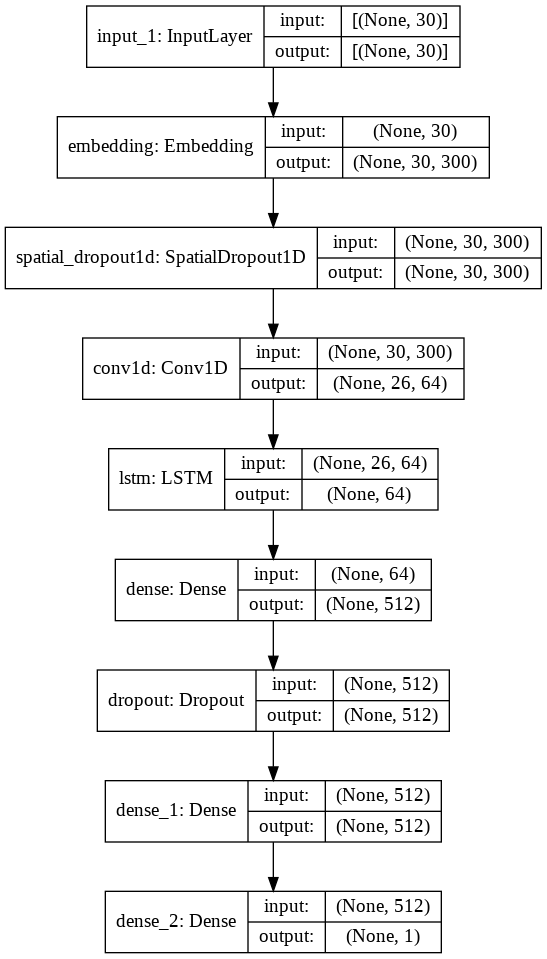

In [32]:
plot_model(lstm_model, to_file = 'model_plot_lstm.png', show_shapes = True, show_layer_names = True)

In [33]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
history = lstm_model.fit(x_train, y_train, batch_size = 1024, epochs = 10, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...
Epoch 1/10
581/581 [==============================] - 181s 251ms/step - loss: 0.1560 - accuracy: 0.9352 - val_loss: 0.0780 - val_accuracy: 0.9708
Epoch 2/10
581/581 [==============================] - 147s 254ms/step - loss: 0.0880 - accuracy: 0.9669 - val_loss: 0.0636 - val_accuracy: 0.9774
Epoch 3/10
581/581 [==============================] - 144s 248ms/step - loss: 0.0739 - accuracy: 0.9723 - val_loss: 0.0577 - val_accuracy: 0.9789
Epoch 4/10
581/581 [==============================] - 145s 250ms/step - loss: 0.0667 - accuracy: 0.9750 - val_loss: 0.0535 - val_accuracy: 0.9804
Epoch 5/10
581/581 [==============================] - 143s 247ms/step - loss: 0.0623 - accuracy: 0.9770 - val_loss: 0.0518 - val_accuracy: 0.9810
Epoch 6/10
581/581 [==============================] - 142s 245ms/step - loss: 0.0581 - accuracy: 0.9784 - val_loss: 0.0511 - val_accuracy: 0.9816
Epoch 7/10
581/581 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


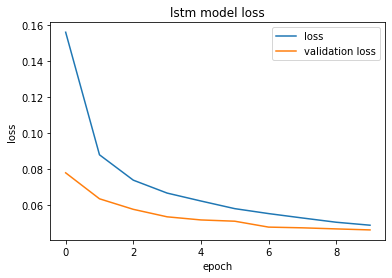

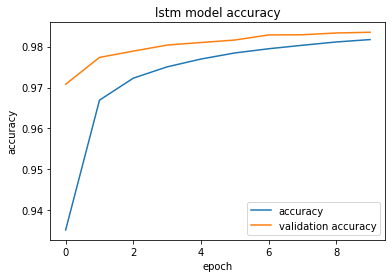

In [35]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('lstm model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'])
plt.show()

In [36]:
def decode_result(score):
    return 0 if score<0.5 else 1

scores = lstm_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_lstm = [decode_result(score) for score in scores]

15/15 [==============================] - 3s 138ms/step


In [43]:
dummy_tweet = tokenizer.texts_to_sequences('I am happy')
dummy_tweet= pad_sequences(dummy_tweet, maxlen=max_length, padding='post')
dummy_tweet_prediction = lstm_model.predict(dummy_tweet)
if (dummy_tweet_prediction.any() < 0.5):
    print('Signs of depression present!')
else:
    print('Normal')

Normal


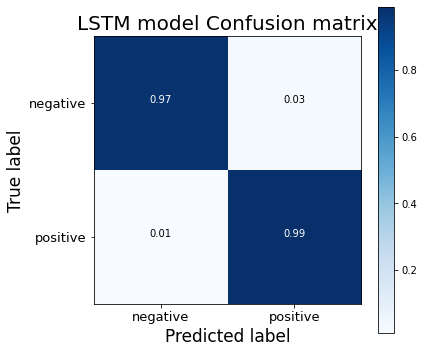

In [44]:
#evaluation
import itertools
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


cnf_matrix = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['negative', 'positive'], title="LSTM model Confusion matrix")
plt.show()

In [45]:
print(classification_report(list(y_test), y_pred_lstm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     54817
           1       0.99      0.99      0.99     93899

    accuracy                           0.98    148716
   macro avg       0.98      0.98      0.98    148716
weighted avg       0.98      0.98      0.98    148716



In [49]:
#CNN-LSTM MODEL
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten

cnn_lstm_model= Sequential()
cnn_lstm_model.add(Embedding(vocab_size, embed_dim, input_length=max_length))
cnn_lstm_model.add(Conv1D(200, kernel_size=3, activation = "relu"))
cnn_lstm_model.add(LSTM(64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.5))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(50, activation='relu'))
cnn_lstm_model.add(Dense(50, activation='relu'))
cnn_lstm_model.add(Flatten())
#l2 regularizer
cnn_lstm_model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
cnn_lstm_model.add(Dense(1, activation='sigmoid'))
#sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
adam=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
cnn_lstm_model.summary()
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           43293900  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 200)           180200    
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 64)            67840     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

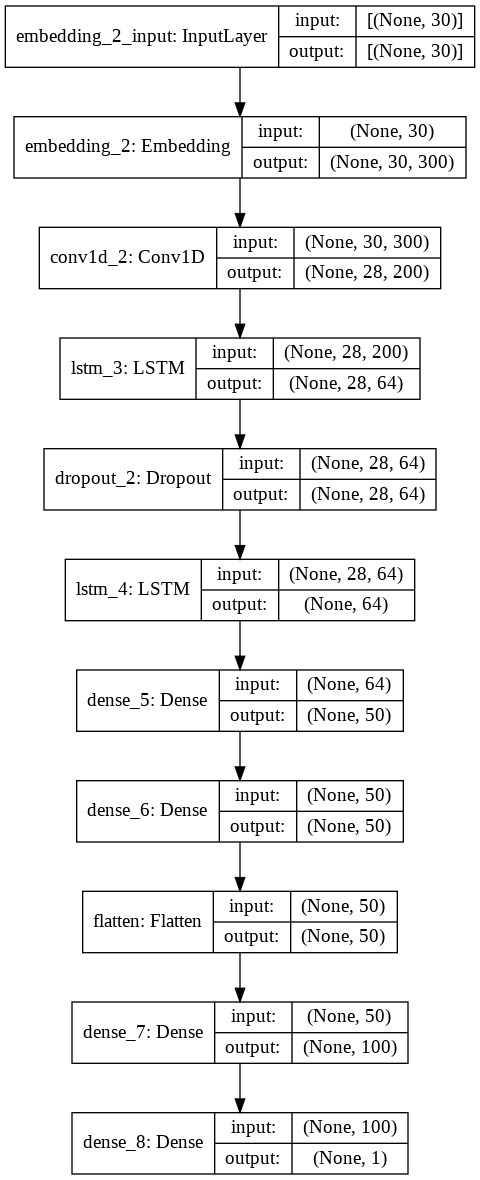

In [50]:
plot_model(cnn_lstm_model, to_file = 'model_plot_cnn_lstm.png', show_shapes = True, show_layer_names = True)

In [52]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
cnn_lstm_history = cnn_lstm_model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Training on GPU...
Epoch 1/5
1162/1162 [==============================] - 86s 74ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0470 - val_accuracy: 0.9896
Epoch 2/5
1162/1162 [==============================] - 86s 74ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0404 - val_accuracy: 0.9898
Epoch 3/5
1162/1162 [==============================] - 86s 74ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0399 - val_accuracy: 0.9899
Epoch 4/5
1162/1162 [==============================] - 86s 74ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0386 - val_accuracy: 0.9895
Epoch 5/5
1162/1162 [==============================] - 86s 74ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0559 - val_accuracy: 0.9898


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


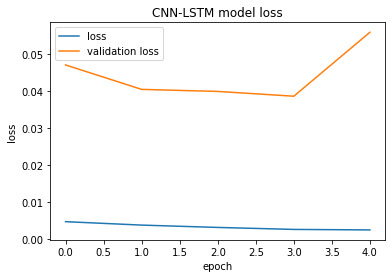

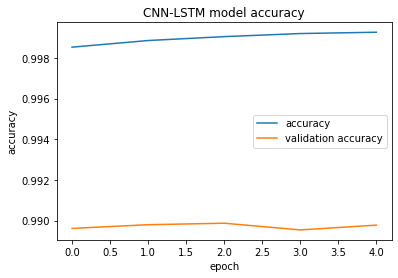

In [53]:
print(cnn_lstm_history.history.keys())
loss = cnn_lstm_history.history['loss']
val_loss = cnn_lstm_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('CNN-LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'])
plt.show()

accuracy = cnn_lstm_history.history['accuracy']
val_accuracy= cnn_lstm_history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('CNN-LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'])
plt.show()

In [54]:
scores = cnn_lstm_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_cnn_lstm = [decode_result(score) for score in scores]

15/15 [==============================] - 4s 156ms/step


In [56]:
dummy_tweet = tokenizer.texts_to_sequences('I suffer from anxiety and feel low all the time')
dummy_tweet= pad_sequences(dummy_tweet, maxlen=max_length, padding='post')
dummy_tweet_prediction = cnn_lstm_model.predict(dummy_tweet)
if (dummy_tweet_prediction.any() < 0.5):
    print('Signs of depression present!')
else:
    print('Normal')

Normal


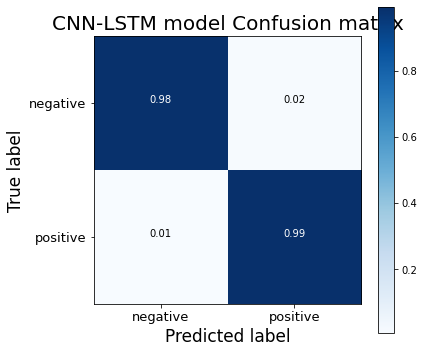

In [57]:
#evaluation

cnn_lstm_cnf_matrix = confusion_matrix(y_test, y_pred_cnn_lstm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnn_lstm_cnf_matrix, classes=['negative', 'positive'], title="CNN-LSTM model Confusion matrix")
plt.show()

In [58]:
print(classification_report(list(y_test), y_pred_cnn_lstm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     54817
           1       0.99      0.99      0.99     93899

    accuracy                           0.99    148716
   macro avg       0.99      0.99      0.99    148716
weighted avg       0.99      0.99      0.99    148716

